In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.txt',header=None)
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


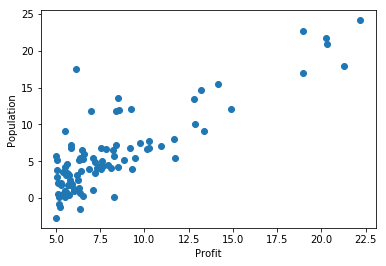

In [31]:
import matplotlib.pyplot as plt
plt.scatter(df[0],df[1])
plt.xlabel('Profit')
plt.ylabel('Population')
plt.show()

In [3]:
df.insert(0,'Ones',1)

In [4]:
df.head()

,Ones,0,1
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [38]:
alpha = 0.01
theta = np.matrix([0,0])
iterations = 1000
X=df.iloc[:,0:2]
y=df.iloc[:,2:3]
X=np.matrix(X.values)
y=np.matrix(y.values)
theta=theta.transpose()
theta

matrix([[0],
        [0]])

In [6]:
def Compute_cost(X,y,theta):
    a = np.power((X*theta-y),2)
    J = (np.sum(a))/(2*len(X))
    return J

In [7]:
prev = Compute_cost(X,y,theta)
prev

32.072733877455676

0

In [8]:
def gradientDescent(X,y,theta,alpha,iterations):
    
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.shape[0])
    cost = np.zeros(iterations)
    
    for i in range(iterations):
        error = (X * theta)-y
 
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[j,0] = theta[j,0]-((alpha / len(X)) * np.sum(term))
 
        theta = temp
        cost[i] = Compute_cost(X, y, theta)
 
    return theta,cost

In [9]:
g, cost = gradientDescent(X, y, theta, alpha, iterations)
g

matrix([[-3.24140214],
        [ 1.1272942 ]])

In [10]:
cost

array([6.73719046, 5.93159357, 5.90115471, 5.89522859, 5.89009494,
       5.88500416, 5.87993248, 5.87487909, 5.86984391, 5.86482687,
       5.85982789, 5.85484692, 5.84988389, 5.84493874, 5.8400114 ,
       5.83510181, 5.8302099 , 5.82533562, 5.82047889, 5.81563965,
       5.81081784, 5.8060134 , 5.80122627, 5.79645638, 5.79170367,
       5.78696808, 5.78224955, 5.77754801, 5.77286341, 5.76819568,
       5.76354477, 5.75891061, 5.75429313, 5.7496923 , 5.74510803,
       5.74054027, 5.73598897, 5.73145406, 5.72693549, 5.72243319,
       5.71794711, 5.71347718, 5.70902336, 5.70458558, 5.70016379,
       5.69575792, 5.69136792, 5.68699373, 5.6826353 , 5.67829257,
       5.67396548, 5.66965398, 5.665358  , 5.6610775 , 5.65681242,
       5.6525627 , 5.64832829, 5.64410913, 5.63990517, 5.63571635,
       5.63154261, 5.62738391, 5.6232402 , 5.6191114 , 5.61499748,
       5.61089837, 5.60681403, 5.60274441, 5.59868944, 5.59464907,
       5.59062326, 5.58661195, 5.58261509, 5.57863263, 5.57466

In [11]:
Compute_cost(X,y,g)

4.515955503078912

In [12]:
print('previously it was: ',prev)

previously it was:  32.072733877455676


Text(0, 0.5, 'Profit')

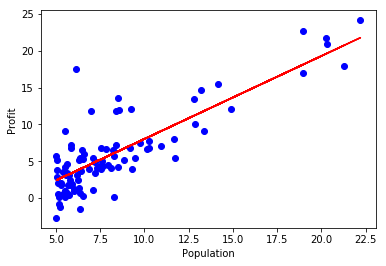

In [51]:
plt.scatter(df[0],df[1], color='blue')
plt.plot(df[0],(X*g),'-r')
plt.xlabel("Population")
plt.ylabel("Profit")

**for population of 35000**

In [57]:
g=np.array(g)

In [70]:
print('Profit: ',(35000*g[1][0])+g[0][0])

Profit:  39452.055682842176


**for population of 70000**

In [71]:
print('Profit: ',(70000*g[1][0])+g[0][0])

Profit:  78907.35276782863


# using sklearn

In [63]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(df[[0]])
train_y = np.asanyarray(df[[1]])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[1.19303364]]
Intercept:  [-3.89578088]


**For population of 35000**

In [73]:
slope = float(regr.coef_)
intercept = float(regr.intercept_)
intercept

-3.8957808783118537

In [69]:
print('Profit: ',(35000*slope)+intercept)

Profit:  41752.28176575748


**For population of 70000**

In [72]:
print('Profit: ',(70000*slope)+intercept)

Profit:  83508.45931239326


### The profit obtained from the model obtained using sklearn yields more profit than that by optimized hypothesis function

**The theta0 and theta1 is less for optimised hypothesis as compared to sklearn model**